# Week 2 Notebook: Data Ingestion and Exploration
The goal of this week's assignment is to identify places the dataset needed preparatiion work for modeling through data ingestiona nd exploration.

## Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile

## Read data as dataframe

In [2]:
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

data_folder = os.path.join(parent_dir,"data")
raw_data_folder = os.path.join(data_folder,"raw")

uber_file_path = os.path.join(raw_data_folder, "uber.csv.zip")
lyft_file_path = os.path.join(raw_data_folder, "lyft.csv.zip")

In [3]:
if os.path.exists(uber_file_path):
    with zipfile.ZipFile(uber_file_path, 'r') as zip_ref:
        zip_ref.extractall(raw_data_folder)
    print(f"Uber file extracted to: {raw_data_folder}")
else:
    print(f"Uber file not found: {uber_file_path}")

if os.path.exists(lyft_file_path):
    with zipfile.ZipFile(lyft_file_path, 'r') as zip_ref:
        zip_ref.extractall(raw_data_folder)
    print(f"Lyft file extracted to: {raw_data_folder}")
else:
    print(f"Lyft file not found: {lyft_file_path}")

Uber file extracted to: /Users/carriexia/Documents/GitHub/ADAN8888.01_Fall_24_Applied_Analytics_Project/data/raw
Lyft file extracted to: /Users/carriexia/Documents/GitHub/ADAN8888.01_Fall_24_Applied_Analytics_Project/data/raw


In [4]:
uber_csv_path = os.path.join(raw_data_folder, "uber.csv")
lyft_csv_path = os.path.join(raw_data_folder, "lyft.csv")

uber_df = pd.read_csv(uber_csv_path)
lyft_df = pd.read_csv(lyft_csv_path)
    
df = pd.concat([uber_df, lyft_df], ignore_index=True)

In [5]:
df = df.sample(n=100000, random_state=42)

## Initial Data Exploration
### Columns
- Since we are trying to predict for ride price, the variable `price` is our target variable.
- Aside from `id`, the rest of the variables are our feature variables.

In [6]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [7]:
df.shape

(100000, 57)

### Check for duplicate rows

In [8]:
if df['id'].duplicated().any():
    print("There are duplicates in the 'id' column.")
else:
    print("No duplicates found in the 'id' column.")

No duplicates found in the 'id' column.


### Check for Data Types

In [9]:
df.dtypes

id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                        object
product_id                      object
name                            object
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

In [10]:
df = df.drop('id', axis = 1)
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if col not in cat_col]

print(f"cat_col = {len(cat_col)}\nnum_col = {len(num_col)}\n")

cat_col = 10
num_col = 46



## Summary Stats

In [11]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,1.000000e+05,100000.000000,100000.00000,100000.000000,92030.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,1.000000e+05,100000.000000,1.000000e+05,100000.000000,1.000000e+05,100000.000000,1.000000e+05,100000.000000,1.000000e+05
mean,1.544047e+09,11.615710,17.80031,11.586980,16.578332,2.188316,1.013713,42.338235,-71.066195,39.570435,...,0.037613,1.544045e+09,33.451973,1.544043e+09,45.252127,1.544049e+09,29.723574,1.544049e+09,41.984046,1.544049e+09
std,6.894674e+05,6.945237,9.96594,0.492379,9.328378,1.139838,0.090700,0.047754,0.020294,6.735647,...,0.055320,6.916319e+05,6.480466,6.904797e+05,5.648202,6.906484e+05,7.121450,6.875310e+05,6.937541,6.915871e+05
min,1.543204e+09,0.000000,1.00000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.00000,11.000000,9.000000,1.270000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543740e+09,12.000000,17.00000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.660000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.00000,12.000000,22.500000,2.910000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.00000,12.000000,92.000000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


### Distrubution
#### Visualize Numerical Variables (Continuous)

In [12]:
discrete_variables = ['hour','day','month','uvIndex']
continuous_variables = [col for col in num_col if col not in discrete_variables]

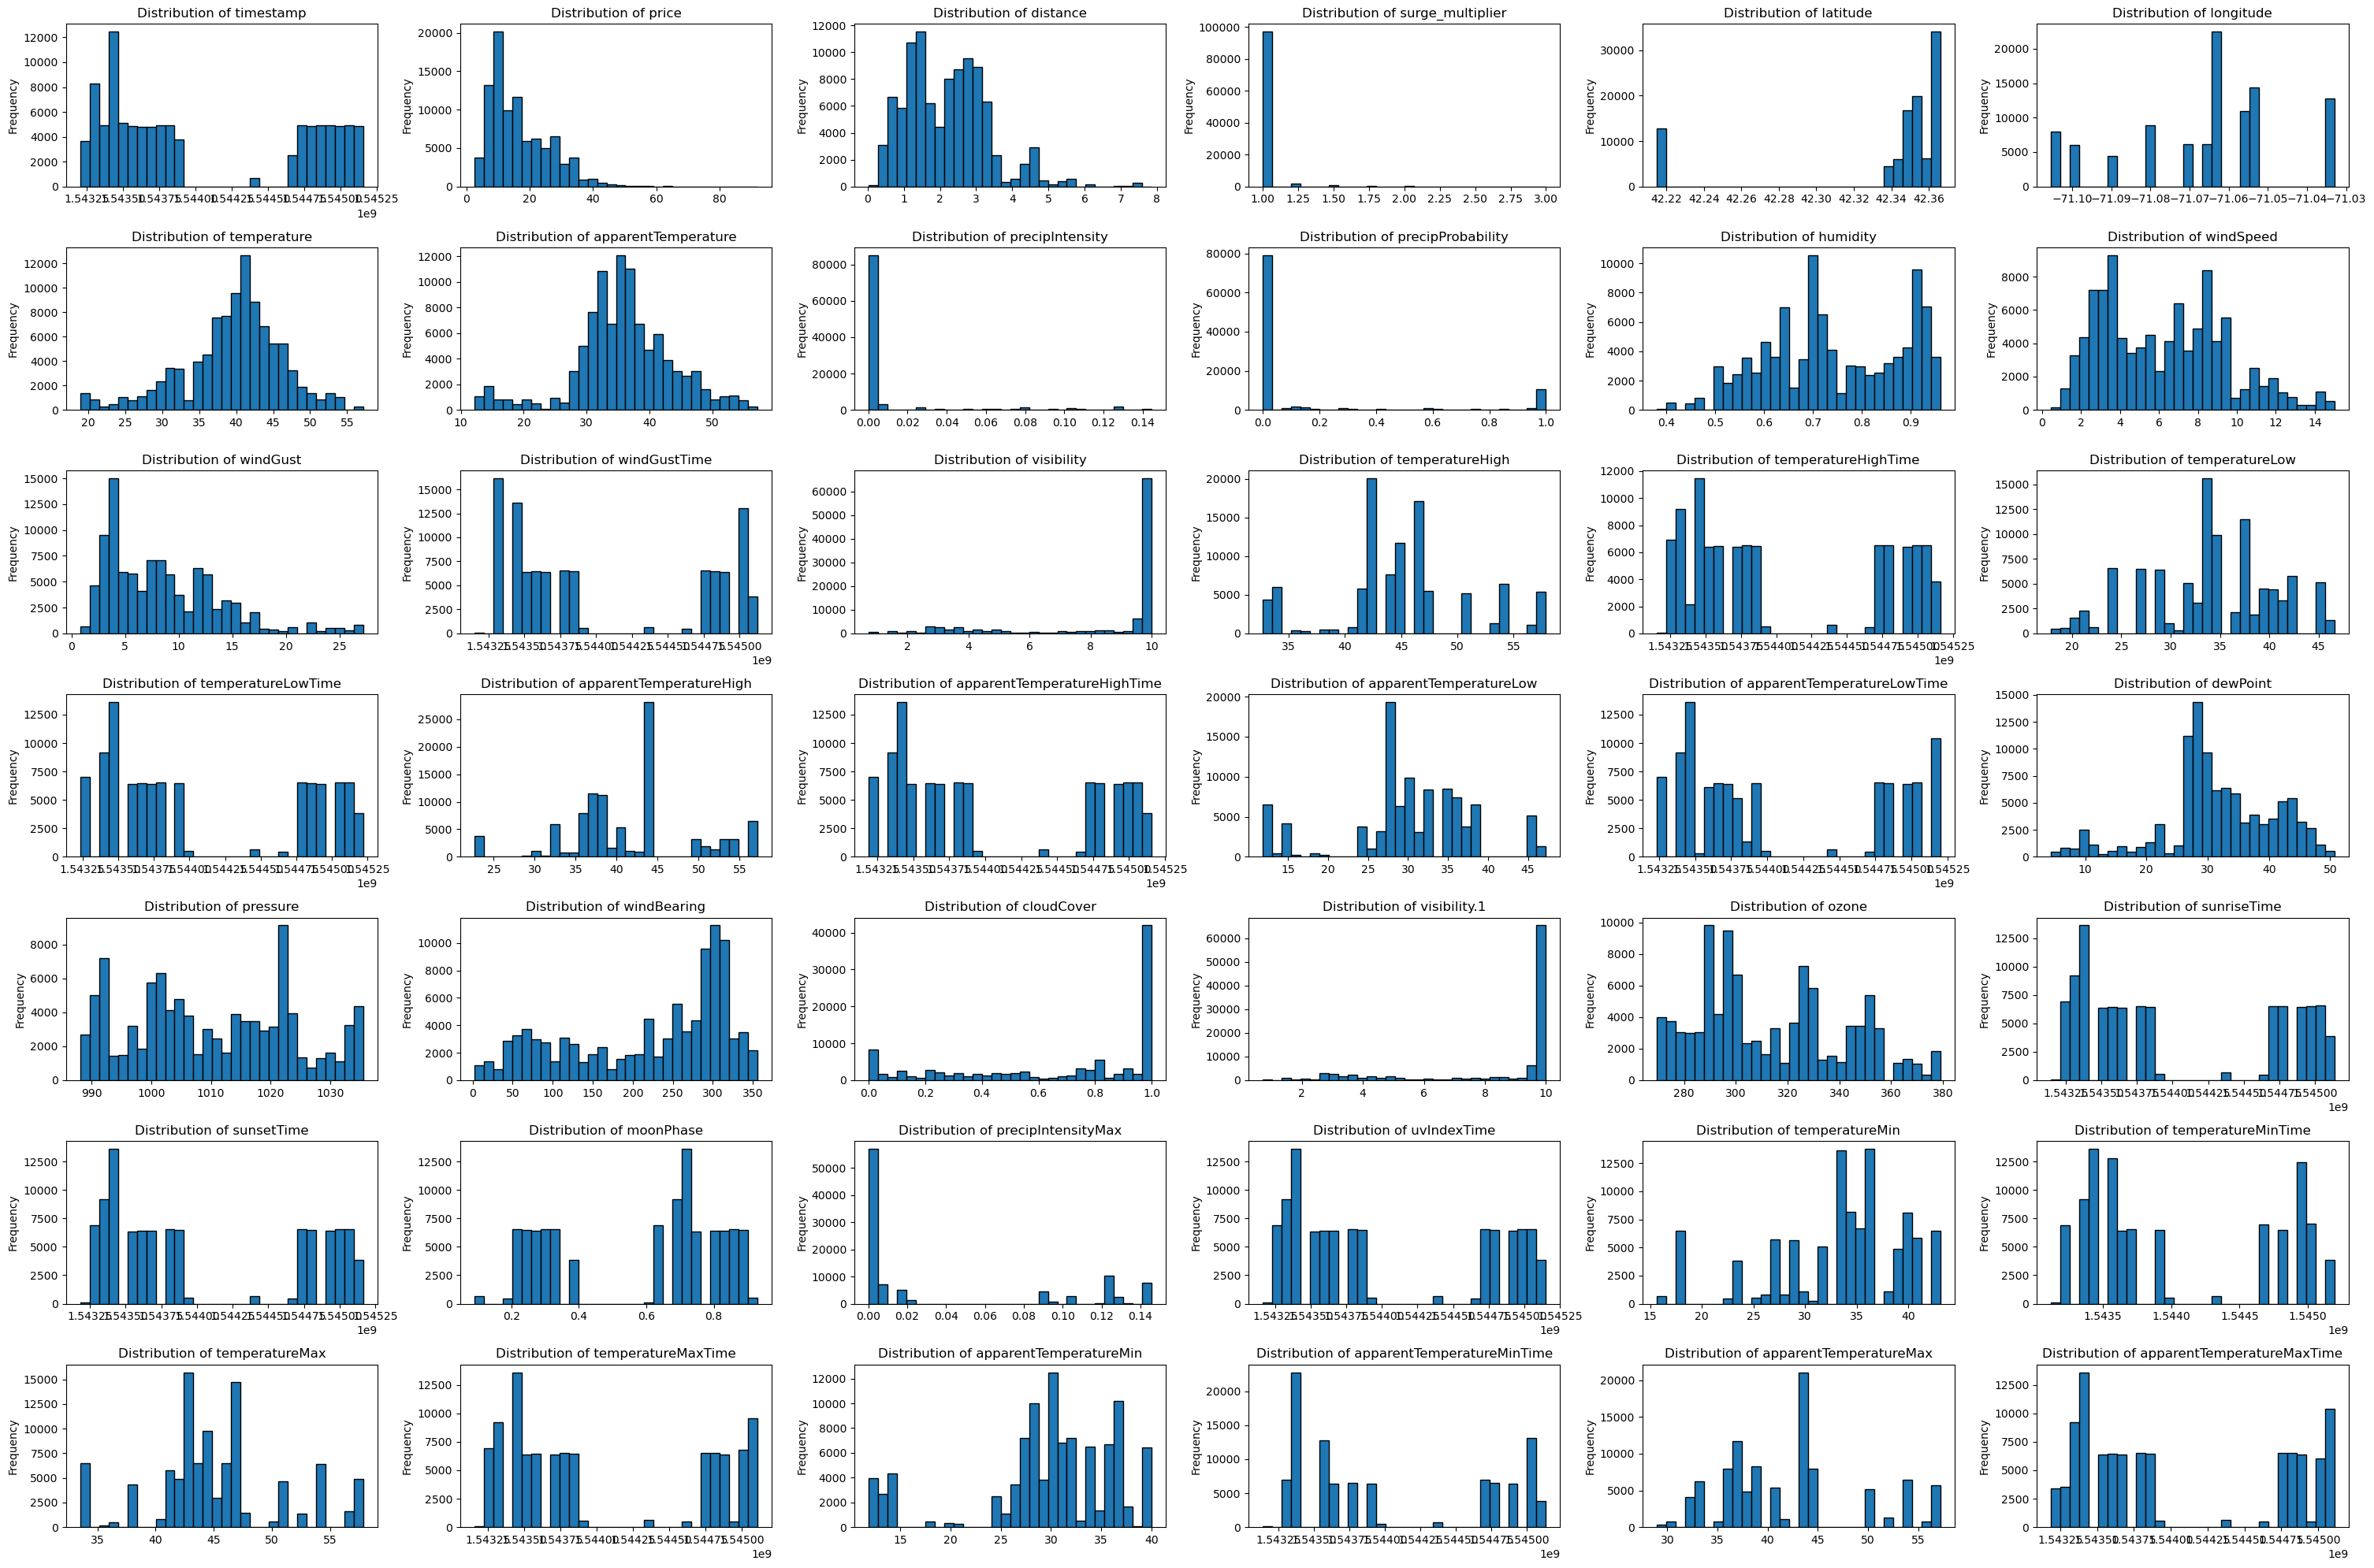

In [13]:
plt.figure(figsize=(30, 20))
for i, col in enumerate(continuous_variables, 1):
    plt.subplot(7, 6, i)
    plt.hist(df[col], bins=30, edgecolor='black')  # Plot histogram using matplotlib
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Visualize Numerical Variables (Discrete)

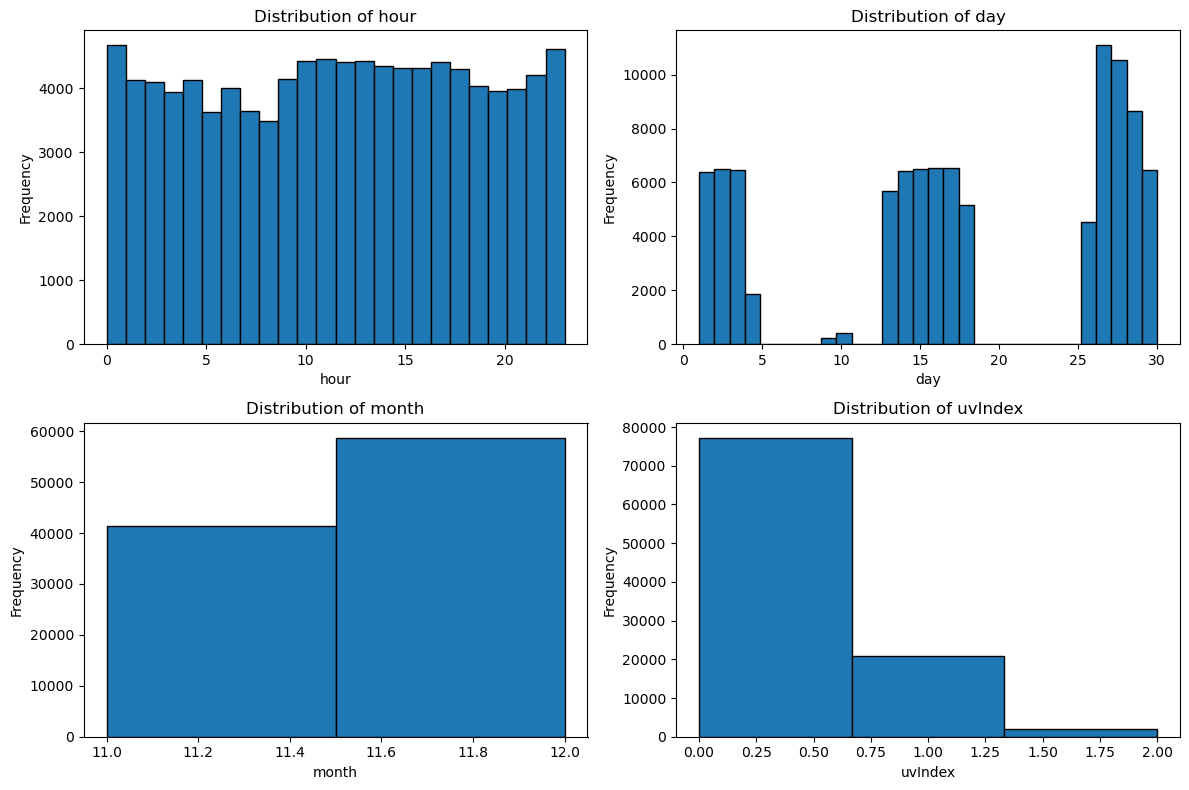

In [14]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(discrete_variables, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col], bins=max(df[col]) - min(df[col]) + 1, edgecolor='black') 
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')
    plt.xlabel(col)  
plt.tight_layout()
plt.show()

### Outliers
Many of the numerical variables in the dataset exhibit skewness and contain numerous outliers. This indicates that the distributions of these variables deviate from normality, which can impact the performance of various statistical models and machine learning algorithms. To address these issues, standardizing the numerical variables is advisable.Therefore, we probably want to standardize them.

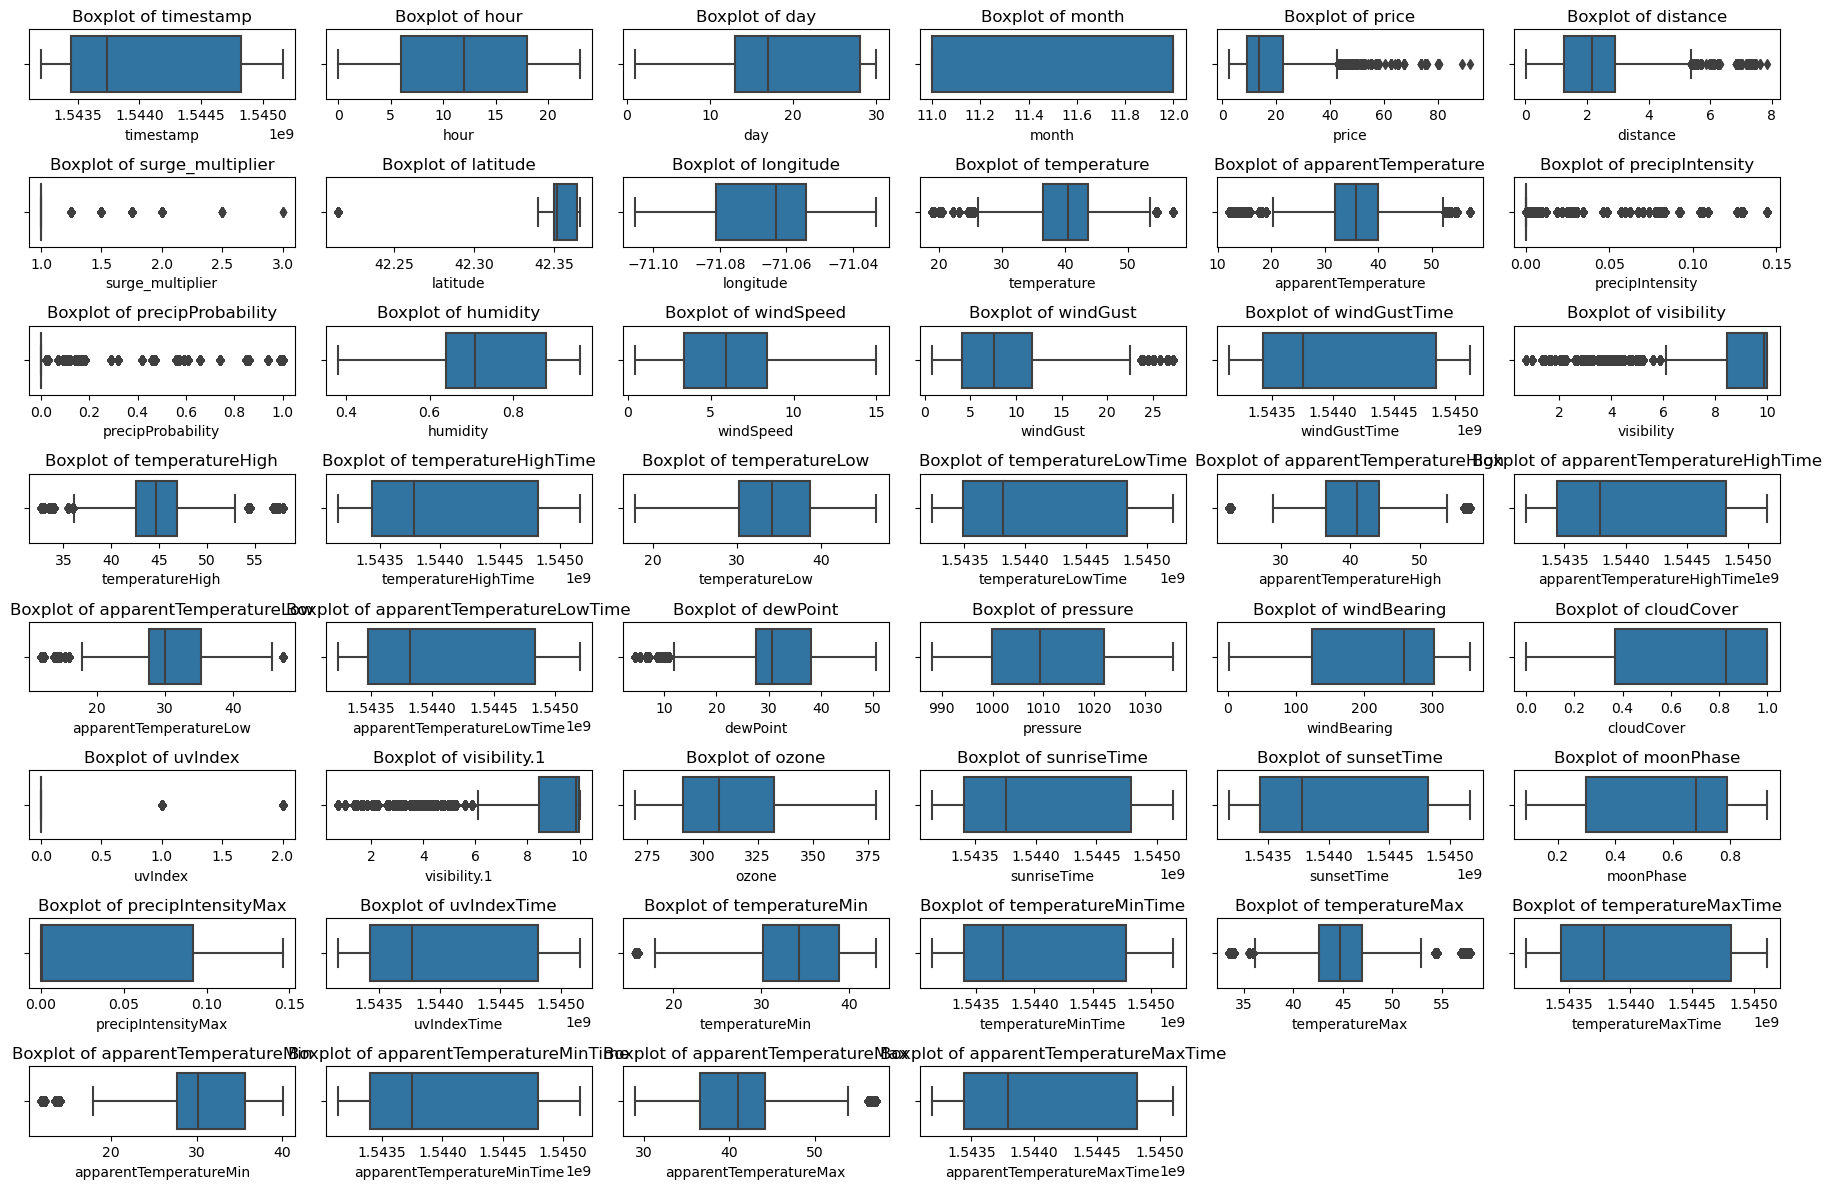

In [15]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(num_col, 1):
    plt.subplot(8, 6, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Although `datetime` is an object, it's not a categorical variable. Therefore, we want to drop it from the categorical columns.


In [16]:
cat_col = [
 'timezone',
 'source',
 'destination',
 'cab_type',
 'product_id',
 'name',
 'short_summary',
 'long_summary',
 'icon']

In [17]:
df['datetime'] = pd.to_datetime(df['datetime'])
unique_datetime = df['datetime'].unique()
print(f'There are {len(unique_datetime)} unique values in datetime variable')

There are 27110 unique values in datetime variable


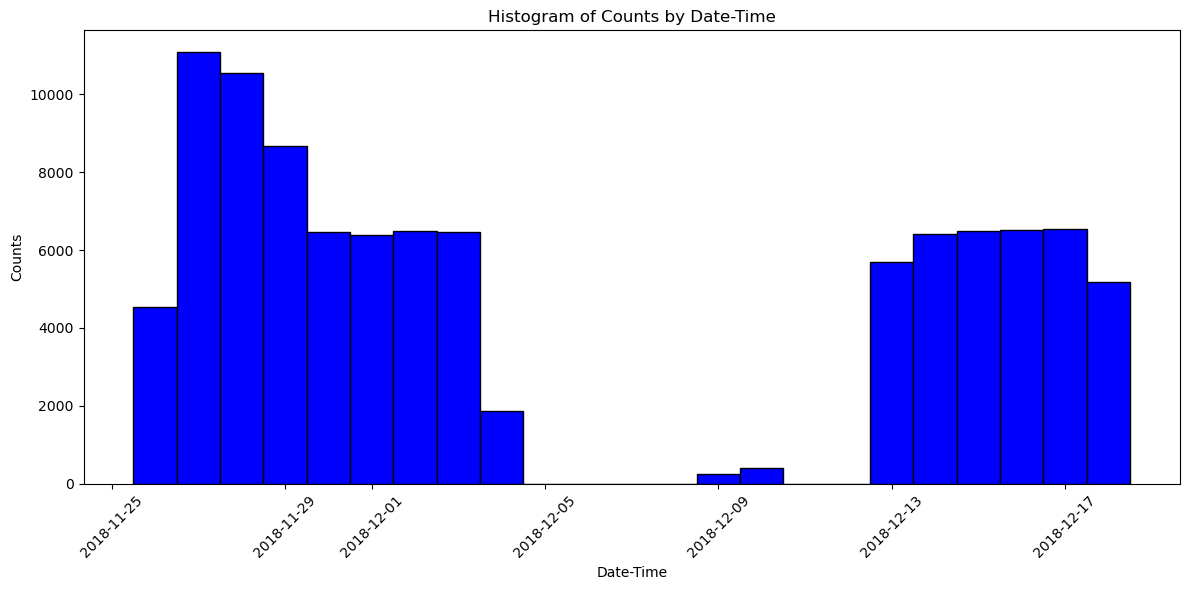

In [18]:
# Resample by day (or other time interval such as 'H' for hourly)
df.set_index('datetime', inplace=True)

# Resample and count the occurrences for each day
date_time_counts = df.resample('D').size()  # Change 'D' to 'H' for hourly or any frequency

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(date_time_counts.index, date_time_counts.values, width=1.0, color='blue', edgecolor='black')

plt.title('Histogram of Counts by Date-Time')
plt.xlabel('Date-Time')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

### Categorical Variables

In [19]:
for col in cat_col:
    print(f'For {col}, the unique classes are:')
    print(df[col].unique())
    print('')

For timezone, the unique classes are:
['America/New_York']

For source, the unique classes are:
['Theatre District' 'Beacon Hill' 'Northeastern University' 'Fenway'
 'Back Bay' 'Haymarket Square' 'South Station' 'Financial District'
 'Boston University' 'North End' 'North Station' 'West End']

For destination, the unique classes are:
['Fenway' 'Haymarket Square' 'North Station' 'Back Bay' 'Beacon Hill'
 'Financial District' 'Theatre District' 'South Station'
 'Boston University' 'West End' 'Northeastern University' 'North End']

For cab_type, the unique classes are:
['Lyft' 'Uber']

For product_id, the unique classes are:
['lyft_plus' '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a' 'lyft' 'lyft_luxsuv'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '997acbb5-e102-41e1-b155-9df7de0a73f2'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969' 'lyft_premier'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d' 'lyft_line' 'lyft_lux'
 '6c84fd89-3f11-4782-9b50-97c468b19529']

For name, the uni

Given the distinct classes, it provides meaningful information for categorical variable encoding and other data preperation needs:
- We can keep either the `name` or `product_id` since `product_id` is essentially identifier for the `name` variable. We likely to keep `name` for readability of the variable.
- Because there is only one distinct class in `timezone`, we can drop this column from training set.
- It seems like `short_summary`, `long_summary`, and `icon` are all summary for weather. Therefore, there might be additional exploration and correlation analysis needed with other numeric weather variable.
- `name` variables could be ordinally encoded, and so are weather-related variable,`short_summary`, `long_summary`, and `icon`, which could potentially be oridnally encoded.

We are also curious about distribution of Uber and Lyft data in the dataset.

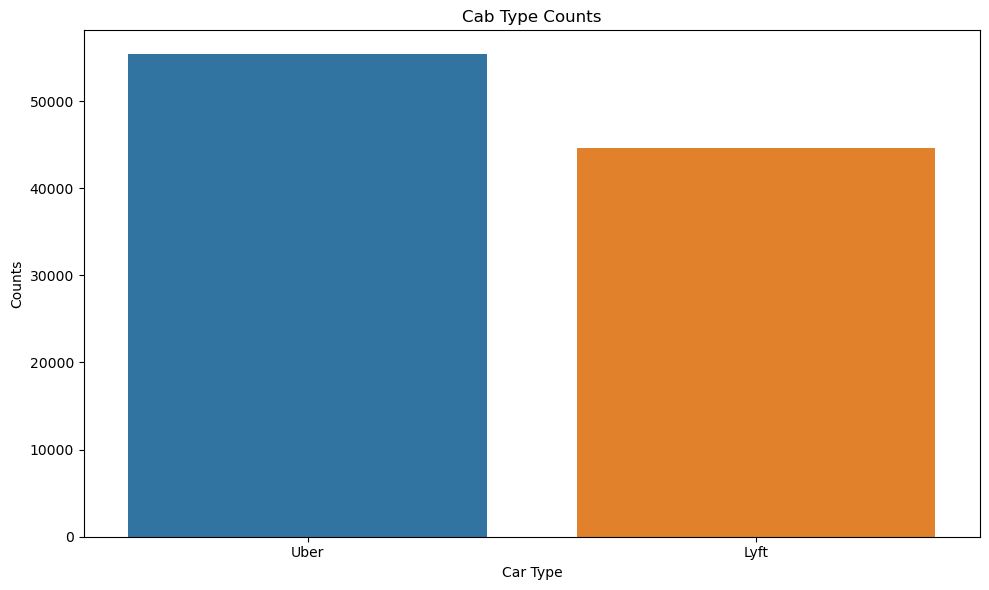

In [20]:
cab_type_counts = df['cab_type'].value_counts()

# Create a bar chart for car_type
plt.figure(figsize=(10, 6))
sns.barplot(x=cab_type_counts.index, y=cab_type_counts.values)

plt.title('Cab Type Counts')
plt.xlabel('Car Type')
plt.ylabel('Counts')
plt.grid(False)  # Add grid lines for better readability
plt.tight_layout()
plt.show()


## Missing Values
The target variable `price` has 55095 missing values which we need to decide how to deal with in data preparation. We can either impute it or drop the rows.

In [21]:
df.isnull().sum()

timestamp                         0
hour                              0
day                               0
month                             0
timezone                          0
source                            0
destination                       0
cab_type                          0
product_id                        0
name                              0
price                          7970
distance                          0
surge_multiplier                  0
latitude                          0
longitude                         0
temperature                       0
apparentTemperature               0
short_summary                     0
long_summary                      0
precipIntensity                   0
precipProbability                 0
humidity                          0
windSpeed                         0
windGust                          0
windGustTime                      0
visibility                        0
temperatureHigh                   0
temperatureHighTime         

Let's take a quick look at rows with missing price.

In [22]:
df_na = df[df['price'].isna()]

In [23]:
df_na.head()

,timestamp,hour,day,month,timezone,source,destination,cab_type,product_id,name,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
datetime,,,,,,,,,,,,,,,,,,,,,
2018-12-02 09:53:05,1.543744e+09,9,2,12,America/New_York,Beacon Hill,Haymarket Square,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,...,0.0894,1543770000,36.40,1543726800,50.94,1543788000,35.78,1543748400,50.27,1543788000
2018-11-30 18:13:04,1.543602e+09,18,30,11,America/New_York,Northeastern University,Beacon Hill,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,...,0.0000,1543593600,28.90,1543579200,42.13,1543600800,26.20,1543575600,40.95,1543608000
2018-11-28 16:02:08,1.543421e+09,16,28,11,America/New_York,Fenway,Theatre District,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,...,0.0000,1543420800,33.75,1543399200,42.60,1543438800,29.97,1543399200,36.58,1543438800
2018-12-18 00:45:10,1.545094e+09,0,18,12,America/New_York,Boston University,Financial District,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,...,0.0177,1545066000,34.18,1545044400,41.41,1545076800,28.19,1545044400,35.91,1545076800
2018-12-04 03:23:00,1.543894e+09,3,4,12,America/New_York,North End,West End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,...,0.0004,1543852800,42.86,1543896000,57.42,1543852800,39.73,1543896000,56.75,1543852800


## Correlation analysis

In [24]:
num_df = df[num_col]
correlation_matrix = num_df.corr()

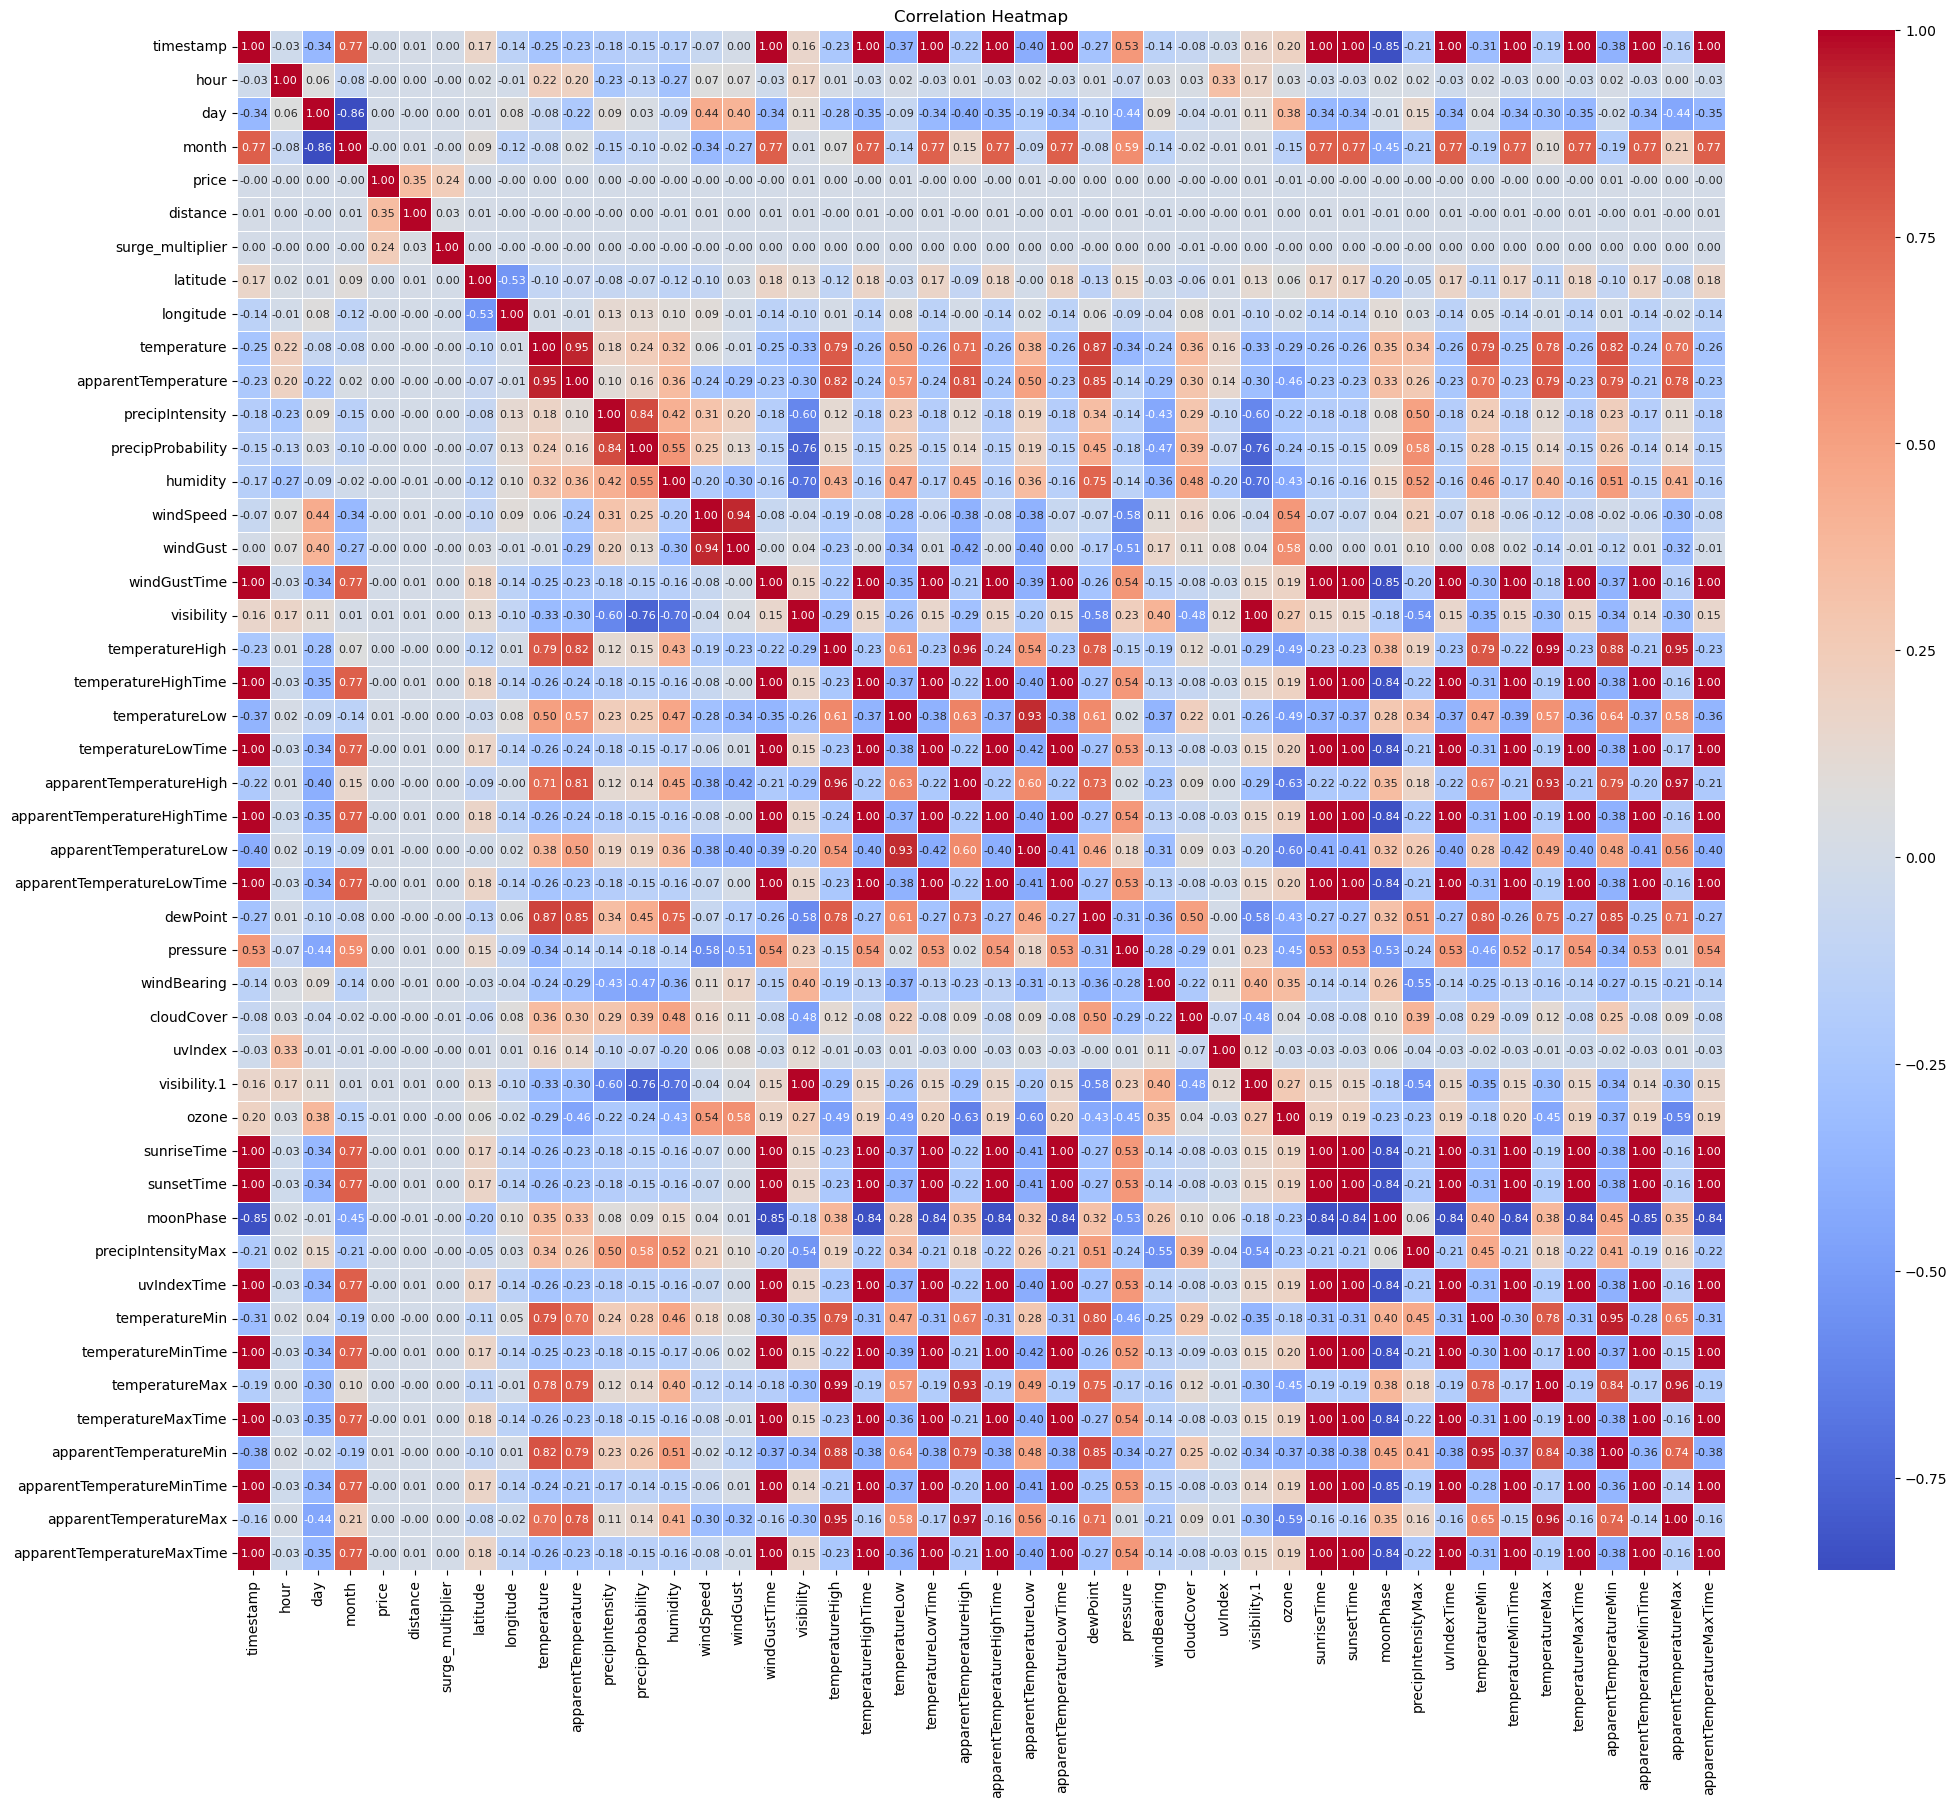

In [25]:
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Heatmap')
plt.show()

A lot of vairables exhibit high correlation, and high correlation among variables can lead to multicollinearity, which can affect the performance and interpretability of regression models. It also indicates needs for feature engineering, and several methods we are considering to approach this problem is:
- Remove Highly Correlated Variables: Identify and drop one variable from each pair of highly correlated variables.
- Combine Variables using the average of the correlated variables or conducting Principal Component Analysis (PCA)
- Apply regularization Techniques such as L1 or L2
- Apply transformations like logarithmic or polynomial transformations to reduce correlation.
- In cases where two variables are highly correlated but both are important, we might also consider creating interaction terms to capture their joint effect.
- Last but not the least, it is important to leverage domain knowledge to determine which variables are most relevant and should be retained.

In [27]:
df.to_csv(os.path.join(raw_data_folder, 'rawSampledData.csv'))